In [2]:
import dataframetransform as cleandata

In [3]:
import dataframeinfo as info
import plotter as plots

In [4]:
loans = cleandata.loans

In [5]:
loans.head(10)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_months,int_rate,instalment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.000000,8000.0,36.0,7.49,248.82,A,A4,...,0.0,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.000000,13200.0,36.0,6.99,407.52,A,A3,...,0.0,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.000000,16000.0,36.0,7.49,497.63,A,A4,...,0.0,0.0,0.0,2021-10-01,12850.16,2022-02-01,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.000000,15000.0,36.0,14.31,514.93,C,C4,...,0.0,0.0,0.0,2021-06-01,13899.67,2022-02-01,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.000000,15000.0,36.0,6.03,456.54,A,A1,...,0.0,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
5,38656111,41439917,2525,2525.000000,2525.0,36.0,11.44,83.20,B,B4,...,0.0,0.0,0.0,2022-01-01,91.39,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
6,38656110,41439916,6675,6675.000000,6675.0,36.0,21.99,254.89,E,E5,...,0.0,0.0,0.0,2021-03-01,6724.95,2022-02-01,2021-03-01,0.0,1,INDIVIDUAL
7,38656067,41439872,26500,26500.000000,26200.0,36.0,19.99,701.95,E,E3,...,0.0,0.0,0.0,2021-08-01,701.95,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.000000,10000.0,60.0,12.99,227.48,C,C2,...,0.0,0.0,0.0,2022-01-01,227.48,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
9,38656052,41439857,10000,9939.462638,10000.0,36.0,8.19,314.25,A,A5,...,0.0,0.0,0.0,2022-01-01,314.25,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL


In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54173 entries, 0 to 54227
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   id                          54173 non-null  int64        
 1   member_id                   54173 non-null  int64        
 2   loan_amount                 54173 non-null  int64        
 3   funded_amount               54173 non-null  float64      
 4   funded_amount_inv           54173 non-null  float64      
 5   term_months                 54173 non-null  float64      
 6   int_rate                    54173 non-null  float64      
 7   instalment                  54173 non-null  float64      
 8   grade                       54173 non-null  category     
 9   sub_grade                   54173 non-null  category     
 10  employment_min_years        54173 non-null  float64      
 11  home_ownership              54173 non-null  category     
 12  annual_in

In [7]:
continuous_dtypes = ["float64", "int64", "datetime64[s]"]
exclude_columns = ["id", "member_id", "policy_code", "application_type"]

In [8]:
# Calculate skew in relevant numeric columns. 
relevant_skew = loans.drop(columns=exclude_columns).skew(numeric_only=True)

# Show non-skewed columns and skew. 
for index, value in relevant_skew.items():
    if -0.5 < value < 0.5:
        print(f"{index}     {value}")

int_rate     0.45592527463680566
employment_min_years     -0.18400513755598247
dti     0.18934017024844713


In [9]:
# Show skewed columns and skew. 
for index, value in relevant_skew.items():
    if value > 0.5 or value < -0.5:
        print(f"{index}     {value}")

loan_amount     0.8045987276901947
funded_amount     0.819908162432026
funded_amount_inv     0.8147356320847864
term_months     1.1436598024514208
instalment     0.9964837640965932
annual_inc     8.732749984602108
delinq_2yrs     5.312419757368575
inq_last_6mths     3.239352260929659
open_accounts     1.0595437819202826
total_accounts     0.7800600928479244
out_prncp     2.354708304153977
out_prncp_inv     2.3551289829758923
total_payment     1.2672635816292295
total_payment_inv     1.2567722958300698
total_rec_prncp     1.2603165044709899
total_rec_int     2.20335575425346
total_rec_late_fee     13.267433192081826
recoveries     14.595305371100382
collection_recovery_fee     27.649317777134538
last_payment_amount     2.4981184800334835
collections_12_mths_ex_med     20.251462828439973


In [10]:
# Create instance of the DataFrameInfo class
loans_info = info.DataFrameInfo(loans)

In [11]:
# Create instance of Plotter class
loans_plots = plots.Plotter(loans)

In [46]:
# Create class that inherits from Plotter

class SkewCheck(plots.Plotter):
   def __init__ (self, data):
     super().__init__(data)
     self.skew_dict = {} 

   def skew_check(self, column, bins=20, kde=True, rot=45, num_labels=20):
      self.histogram(column, bins, kde).format_hist(rot, num_labels)
      k2 = self.k2_test(column)
      self.skew_dict[column] = k2

   def show_dict(self):
      print(self.skew_dict)

In [47]:
# Create instance of the SkewCheck class
skew_info = SkewCheck(loans)

K^2 test statistic = 1720.483, p = 0.000


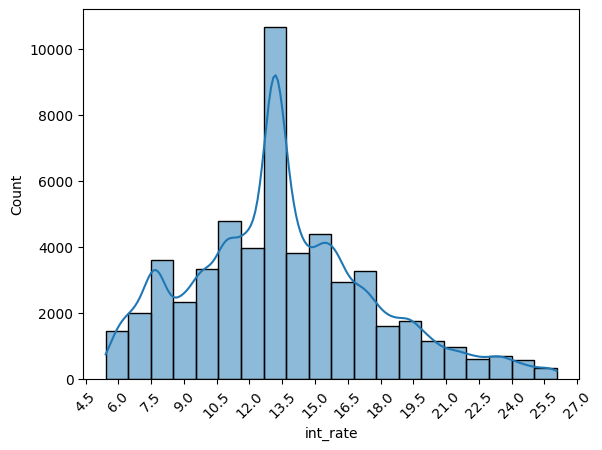

In [48]:
skew_info.skew_check("int_rate")

K^2 test statistic = 347060.910, p = 0.000


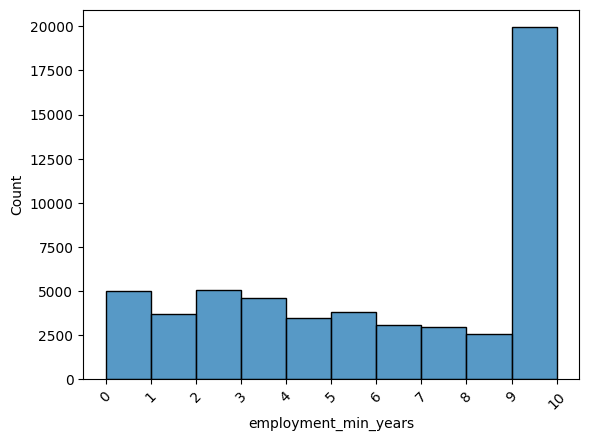

In [37]:
skew_info.skew_check("employment_min_years", 10, False, num_labels=11)
# Not sure why the result of .skew() was good for this one. 

K^2 test statistic = 1236.329, p = 0.000


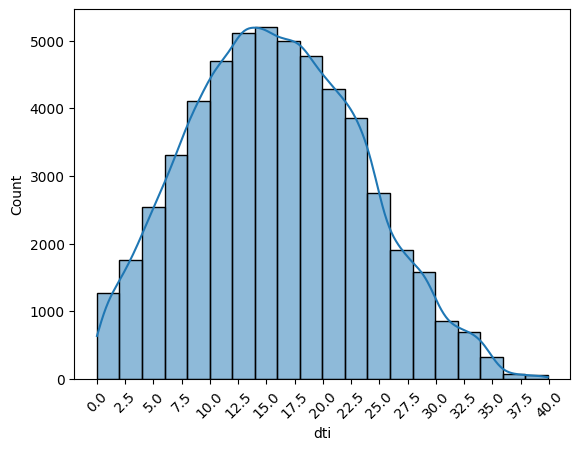

In [49]:
skew_info.skew_check("dti")

K^2 test statistic = 4574.836, p = 0.000


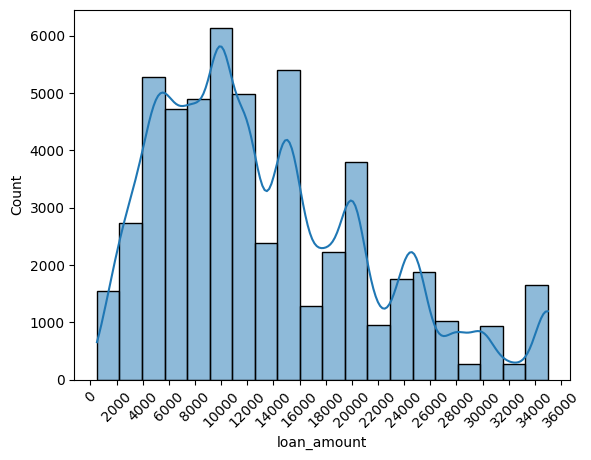

In [50]:
skew_info.skew_check("loan_amount")
# Positive skew may be worth fixing.

K^2 test statistic = 4731.279, p = 0.000


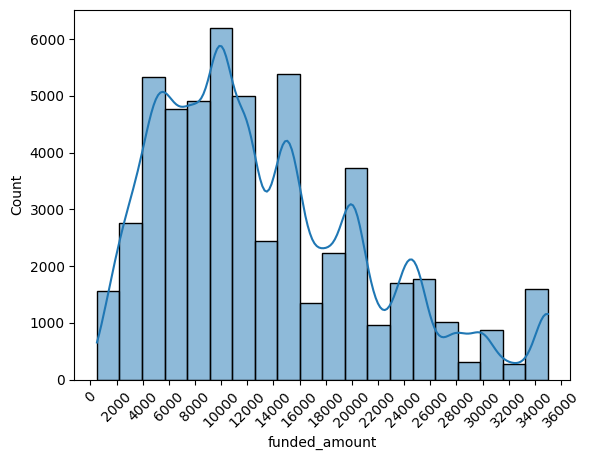

In [51]:
skew_info.skew_check("funded_amount")

K^2 test statistic = 4688.198, p = 0.000


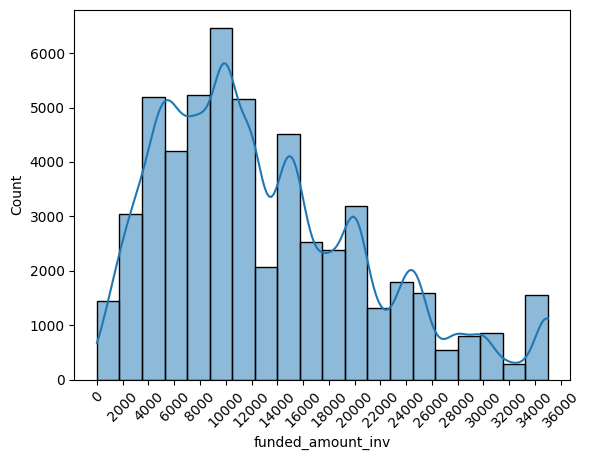

In [52]:
skew_info.skew_check("funded_amount_inv")

K^2 test statistic = 7274.975, p = 0.000


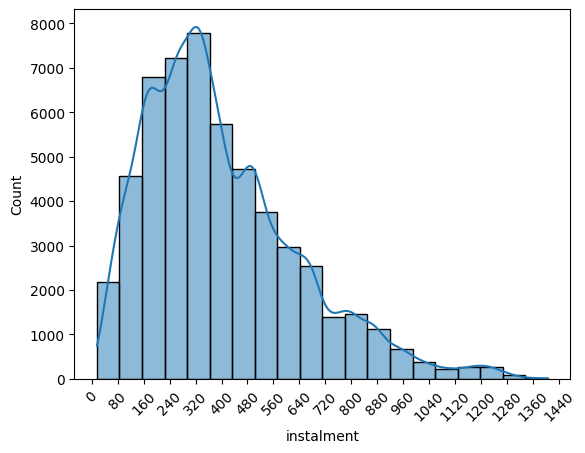

In [53]:
skew_info.skew_check("instalment")

K^2 test statistic = 80484.555, p = 0.000


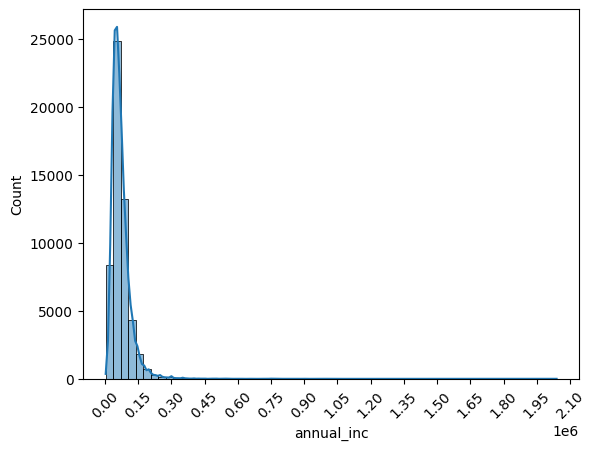

In [17]:
skew_info.skew_check("annual_inc", 60)

K^2 test statistic = 57879.466, p = 0.000


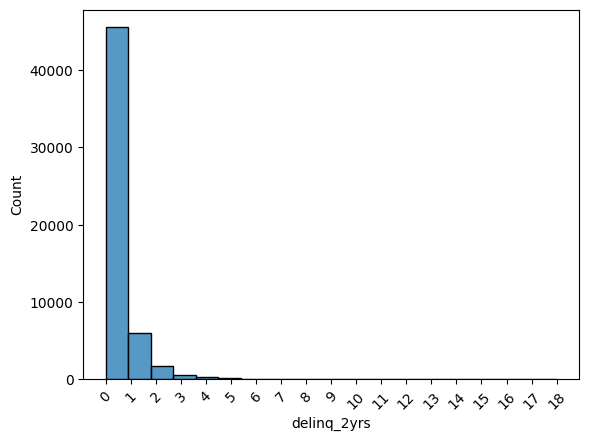

In [24]:
skew_info.skew_check("delinq_2yrs", 20, False)

K^2 test statistic = 42202.059, p = 0.000


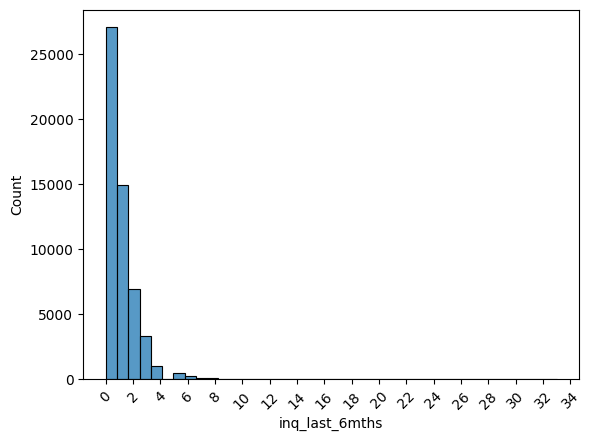

In [28]:
skew_info.skew_check("inq_last_6mths", 40, kde=False)

K^2 test statistic = 9782.864, p = 0.000


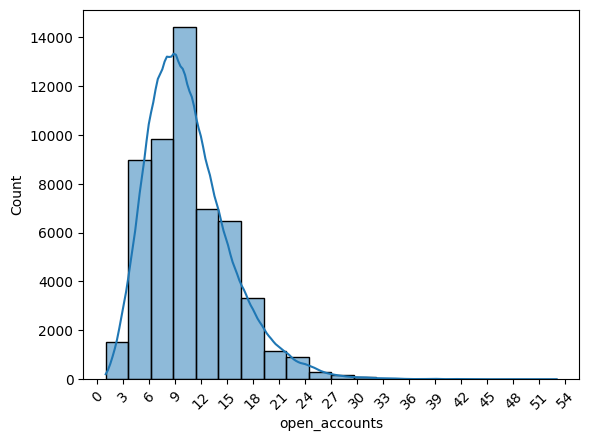

In [22]:
skew_info.skew_check("open_accounts")
# Could be worth fixing skew here.

K^2 test statistic = 4968.274, p = 0.000


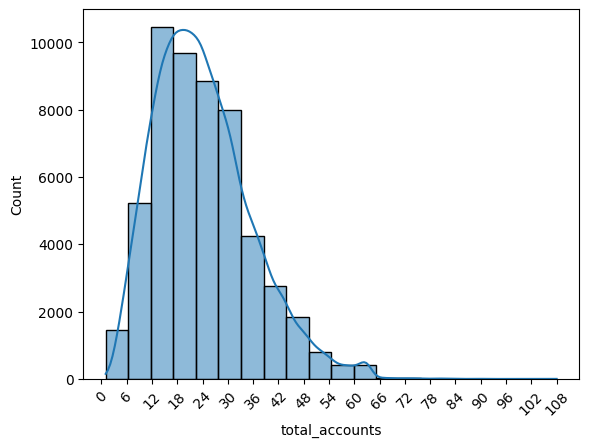

In [32]:
skew_info.skew_check("total_accounts")

In [31]:
skew_info.show_dict()

{'loan_amount': 4574.84, 'funded_amount': 4731.28, 'funded_amount_inv': 4688.2, 'instalment': 7274.98, 'annual_inc': 80484.55, 'delinq_2yrs': 57879.47, 'inq_last_6mths': 42202.06, 'open_accounts': 9782.86, 'dti': 1236.33, 'int_rate': 1720.48}


## Columns to transform
- **loan_amount, funded_amount and funded_amount_inv** all very similar, could fix positive skew. 
- **installment**: Positive skew. 
- **annual_inc**: Heavy positive skew.
- **delinq_2yrs and inq_last_6mths**: both have heavy positive skew. Not sure whether it makes sense to adjust... 
- **open_accounts** : Nice distribution but some potitive skew.
- **total_accounts**: Nice distribution but some positive skew. 